In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r'C:\Users\raich\Desktop\project2\-Customer-Churn-Demand-Prediction-Using-ML\Data\telco_churn.csv')

In [4]:
data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000381469727,False
1,1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.1500015258789,True
3,3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.64999389648438,True


In [5]:
data.info(),data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5043 non-null   int64  
 1   customerID        5043 non-null   object 
 2   gender            5043 non-null   object 
 3   SeniorCitizen     5043 non-null   object 
 4   Partner           5043 non-null   object 
 5   Dependents        5043 non-null   object 
 6   tenure            5043 non-null   int64  
 7   PhoneService      5043 non-null   object 
 8   MultipleLines     4774 non-null   object 
 9   InternetService   5043 non-null   object 
 10  OnlineSecurity    4392 non-null   object 
 11  OnlineBackup      4392 non-null   object 
 12  DeviceProtection  4392 non-null   object 
 13  TechSupport       4392 non-null   object 
 14  StreamingTV       4392 non-null   object 
 15  StreamingMovies   4392 non-null   object 
 16  Contract          5043 non-null   object 


(None,
 Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
        'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
        'Churn'],
       dtype='object'))

In [6]:
data.shape

(5043, 22)

In [7]:
data.isnull().sum()

Unnamed: 0            0
customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [8]:
data.isnull().sum()[data.isnull().sum()>0].sort_values(ascending=False)

OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
MultipleLines       269
TotalCharges          5
Churn                 1
dtype: int64

In [9]:
data.isnull().mean()

Unnamed: 0          0.000000
customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.053341
InternetService     0.000000
OnlineSecurity      0.129090
OnlineBackup        0.129090
DeviceProtection    0.129090
TechSupport         0.129090
StreamingTV         0.129090
StreamingMovies     0.129090
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.000991
Churn               0.000198
dtype: float64

In [10]:
df=data.isnull().sum(axis=1)
print(df[df>1])

11      6
16      6
21      6
22      6
33      6
       ..
2984    6
2987    6
2989    6
2993    6
2999    6
Length: 653, dtype: int64


In [11]:
data.loc[data.isnull().sum(axis=1)==6].head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,11,7469-LKBCI,Male,False,False,False,16,True,False,No,...,NaN,NaN,NaN,NaN,Two year,False,Credit card (automatic),18.950001,326.79998779296875,False
16,16,8191-XWSZG,Female,False,False,False,52,True,False,No,...,NaN,NaN,NaN,NaN,One year,False,Mailed check,20.650000,1022.9500122070312,False
21,21,1680-VDCWW,Male,False,True,False,12,True,False,No,...,NaN,NaN,NaN,NaN,One year,False,Bank transfer (automatic),19.799999,202.25,False
22,22,1066-JKSGK,Male,False,False,False,1,True,False,No,...,NaN,NaN,NaN,NaN,Month-to-month,False,Mailed check,20.150000,20.149999618530273,True
33,33,7310-EGVHZ,Male,False,False,False,1,True,False,No,...,NaN,NaN,NaN,NaN,Month-to-month,False,Bank transfer (automatic),20.200001,20.200000762939453,False


In [12]:
data.columns.to_list()


['Unnamed: 0',
 'customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [13]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')

In [14]:
data.fillna({'TotalCharges':data['TotalCharges'].median()},inplace=True)

In [ ]:
for col in data.select_dtypes(include='object').columns:
    print(f'{col} :,{data[col].unique()}')

customerID :,['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender :,['Female' 'Male']
SeniorCitizen :,['False' 'True' '0' '1']
Partner :,['True' 'False' 'No' 'Yes']
Dependents :,['False' 'True' 'No' 'Yes']
PhoneService :,['False' 'True' 'Yes' 'No']
MultipleLines :,[nan 'False' 'True' 'No' 'No phone service' 'Yes']
InternetService :,['DSL' 'Fiber optic' 'No']
OnlineSecurity :,['False' 'True' nan 'No' 'Yes' 'No internet service']
OnlineBackup :,['True' 'False' nan 'No' 'Yes' 'No internet service']
DeviceProtection :,['False' 'True' nan 'No' 'Yes' 'No internet service']
TechSupport :,['False' 'True' nan 'Yes' 'No' 'No internet service']
StreamingTV :,['False' 'True' nan 'No' 'Yes' 'No internet service']
StreamingMovies :,['False' 'True' nan 'No' 'Yes' 'No internet service']
Contract :,['Month-to-month' 'One year' 'Two year']
PaperlessBilling :,['True' 'False' 'Yes' 'No']
PaymentMethod :,['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 

In [16]:
col_to_fix=[
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [17]:
# Replace 'True'/'False', '1'/'0' with 'Yes'/'No'
for col in col_to_fix:
    data[col] = data[col].replace({
        'True': 'Yes',
        'False': 'No',
        '1': 'Yes',
        '0': 'No',
        'No internet service': 'No',
        'No phone service': 'No'
    })

In [18]:
data.isnull().sum()

Unnamed: 0            0
customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 1
dtype: int64

In [19]:
#numeric columns
numeric_col=data.select_dtypes(include=['number']).columns
print(numeric_col)

Index(['Unnamed: 0', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


In [20]:
for col in numeric_col:
    invalid=data[data[col]<0]
    if not invalid.empty:
        print(invalid([col]))

In [21]:
# Exploring target variable

print(pd.Series(data['Churn']).value_counts())

Churn
No     3706
Yes    1336
Name: count, dtype: int64


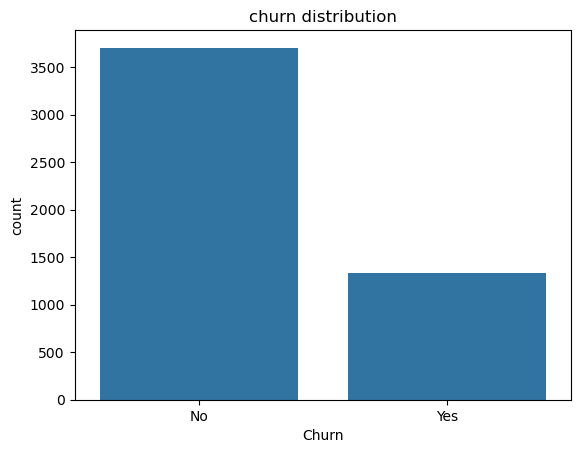

In [22]:
sns.countplot(data,x='Churn')
plt.title('churn distribution')
plt.show()

In [23]:
data.describe()

,Unnamed: 0,tenure,MonthlyCharges,TotalCharges
count,5043.000000,5043.000000,5043.000000,5043.000000
mean,1305.651993,32.576641,65.090214,2300.633691
std,801.484415,24.529807,30.068133,2267.965879
min,0.000000,0.000000,18.400000,18.799999
25%,630.000000,9.000000,35.775000,418.000000
50%,1260.000000,29.000000,70.550003,1401.150024
75%,1890.500000,56.000000,90.050003,3857.575073
max,2999.000000,72.000000,118.650002,8670.100000



tenure stats:
count    5043.000000
mean       32.576641
std        24.529807
min         0.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64


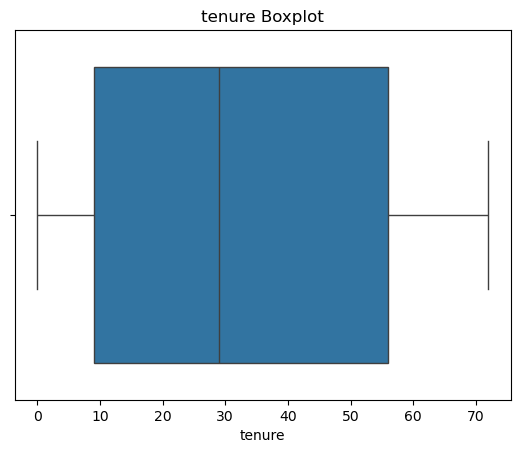


MonthlyCharges stats:
count    5043.000000
mean       65.090214
std        30.068133
min        18.400000
25%        35.775000
50%        70.550003
75%        90.050003
max       118.650002
Name: MonthlyCharges, dtype: float64


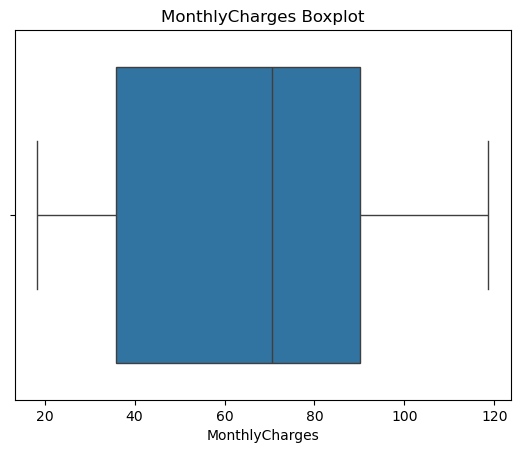


TotalCharges stats:
count    5043.000000
mean     2300.633691
std      2267.965879
min        18.799999
25%       418.000000
50%      1401.150024
75%      3857.575073
max      8670.100000
Name: TotalCharges, dtype: float64


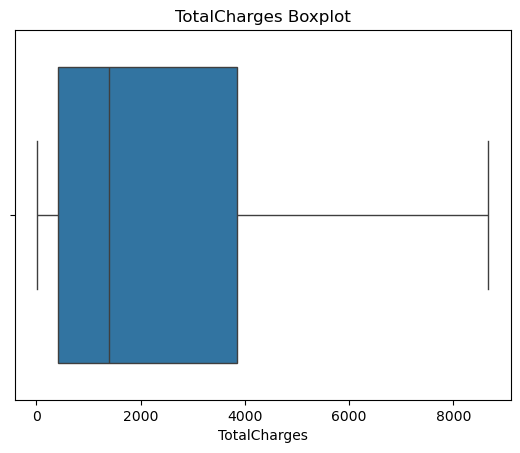

In [24]:
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    print(f"\n{col} stats:")
    print(data[col].describe())
    sns.boxplot(data=data, x=col)
    plt.title(f'{col} Boxplot')
    plt.show()

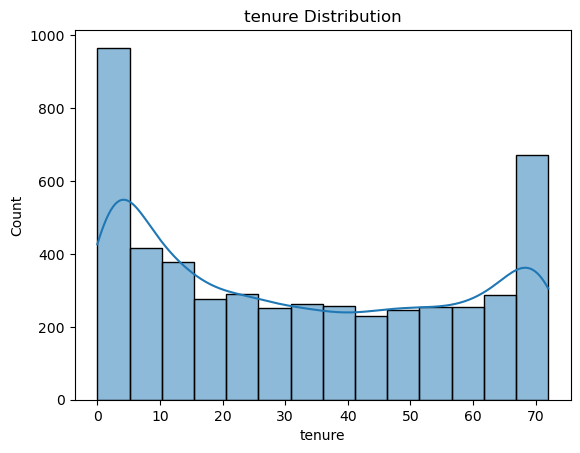

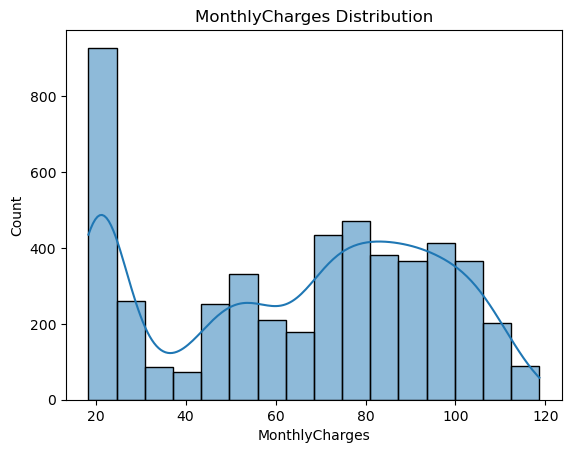

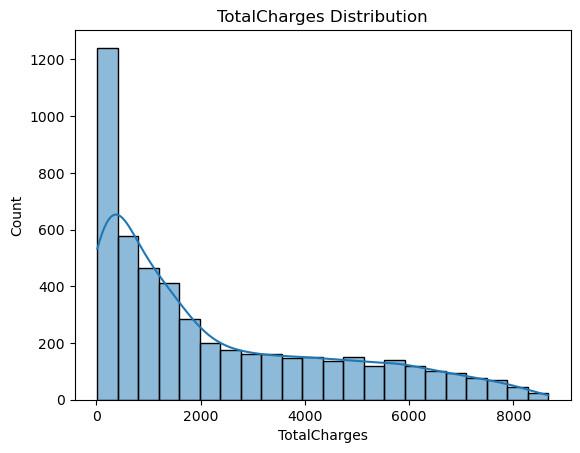

In [25]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numeric_cols:
    plt.figure()
    sns.histplot(data[col], kde=True)
    plt.title(f'{col} Distribution')

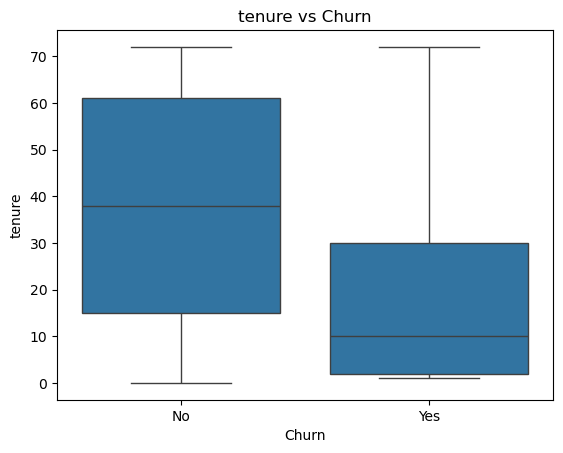

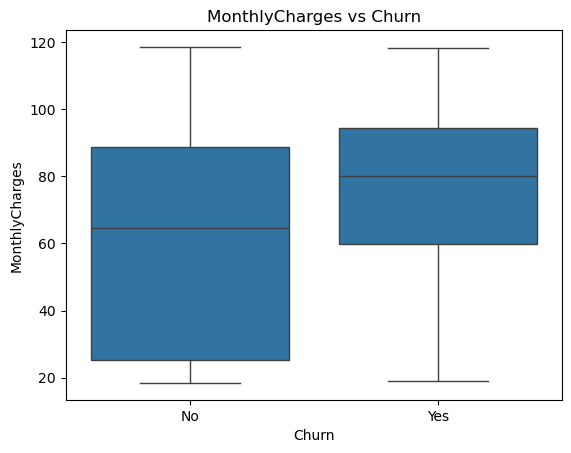

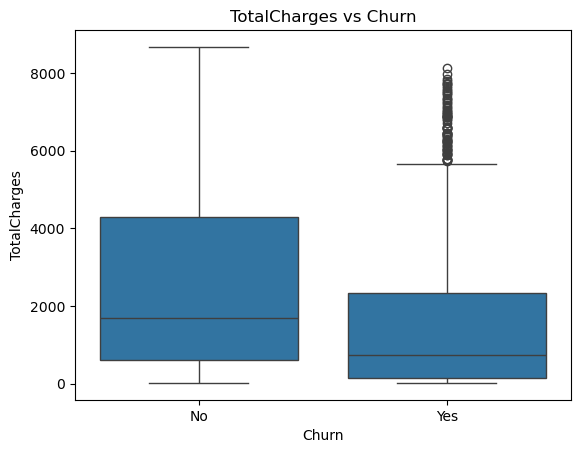

In [27]:
# Convert Churn column to binary: Yes=1, No=0
data['Churn_flag'] = data['Churn'].map({'Yes': 1, 'No': 0})

# Compare numeric features with Churn using boxplots
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x='Churn', y=col, data=data)
    plt.title(f'{col} vs Churn')


In [29]:
#catogorical columns
cat_col=data.select_dtypes(include='object').columns
print(cat_col)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')


In [34]:
for col in cat_col:
    print(f"\n{col} vs Churn:")
    print(pd.crosstab(data[col],data['Churn'],normalize='index'))


customerID vs Churn:
Churn        No  Yes
customerID          
0002-ORFBO  1.0  0.0
0011-IGKFF  0.0  1.0
0013-EXCHZ  0.0  1.0
0013-MHZWF  1.0  0.0
0013-SMEOE  1.0  0.0
...         ...  ...
9985-MWVIX  0.0  1.0
9992-RRAMN  0.0  1.0
9992-UJOEL  1.0  0.0
9993-LHIEB  1.0  0.0
9995-HOTOH  1.0  0.0

[5042 rows x 2 columns]

gender vs Churn:
Churn         No       Yes
gender                    
Female  0.733897  0.266103
Male    0.736122  0.263878

SeniorCitizen vs Churn:
Churn                No       Yes
SeniorCitizen                    
No             0.764149  0.235851
Yes            0.584860  0.415140

Partner vs Churn:
Churn          No       Yes
Partner                    
No       0.674275  0.325725
Yes      0.798942  0.201058

Dependents vs Churn:
Churn             No       Yes
Dependents                    
No          0.684286  0.315714
Yes         0.848174  0.151826

PhoneService vs Churn:
Churn               No       Yes
PhoneService                    
No            0.754601  0.

| **Feature**           | **Key Pattern / Insight**                                           | **Churn Tendency**               |
| --------------------- | ------------------------------------------------------------------- | -------------------------------- |
| **Tenure**            | Low-tenure customers are more likely to churn.                      | 📈 Higher churn for short tenure |
| **Contract Type**     | Month-to-month users churn much more than 1–2 year users.           | 📈 Month-to-month = 43% churn    |
| **Senior Citizen**    | Senior citizens have a significantly higher churn rate.             | 📈 41% churn vs 24% others       |
| **Internet Service**  | Fiber optic users churn more than DSL or non-internet users.        | 📈 Fiber = 42% churn             |
| **Online Security**   | Lack of security services leads to more churn.                      | 📈 No security = 37% churn       |
| **Tech Support**      | No tech support is linked to higher churn.                          | 📈 No support = 37% churn        |
| **Paperless Billing** | Paperless billing users churn more.                                 | 📈 33% churn vs 16%              |
| **Payment Method**    | Electronic check users have the highest churn.                      | 📈 44.6% churn                   |
| **Total Charges**     | Low charges often mean new customers, who are more likely to churn. | 🔁 Indirect effect via tenure    |


In [ ]:
cat=['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
 'InternetService', 'OnlineSecurity', 'OnlineBackup',
 'DeviceProtection', 'TechSupport', 'Contract',
 'PaperlessBilling', 'PaymentMethod']


In [37]:
# correlations
correlation=data[numeric_cols].corr()
print(correlation)

                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.240645      0.825839
MonthlyCharges  0.240645        1.000000      0.646828
TotalCharges    0.825839        0.646828      1.000000


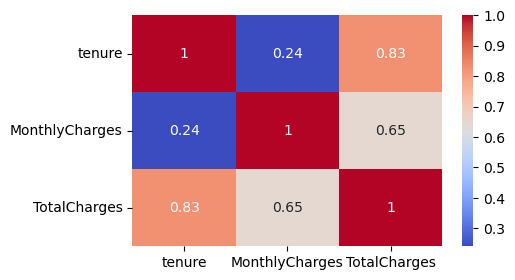

In [39]:

# Visualizing correlations
plt.figure(figsize=(5, 3))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()


## What I Found (EDA Summary)

### Interesting Patterns:
- People with **shorter tenure** (newer customers) are more likely to churn.
- Customers with **month-to-month contracts** leave more often.
- **Senior citizens** tend to churn more than younger customers.
- Having **no tech support** or **online security** is linked to higher churn.
- Using **fiber optic internet** also seems to increase churn.

---

### ✅ Features I’ll Keep:
- Good ones: `Contract`, `InternetService`, `TechSupport`, `tenure`, `MonthlyCharges`, `TotalCharges`, etc.

---

### ❌ Features to Fix or Remove:
- `customerID`: Just an ID, not useful for predictions.
- `TotalCharges`: Has missing values – needs fixing before use.

---

### What I’ll Do Next:
- Clean `TotalCharges` (convert to number, fill or drop missing)
- Turn text data (like Contract, Gender) into numbers (encoding)
- Maybe scale the numbers (like MonthlyCharges) if needed
- Then, split the data and try out some models!



In [42]:
data.to_csv(r'C:\Users\raich\Desktop\project2\-Customer-Churn-Demand-Prediction-Using-ML\Data\cleaned_telco.csv', index=False)
